In [2]:
import pandas as pd
df=pd.read_csv('d:/data/creditcard/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


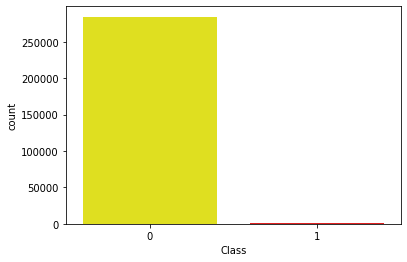

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
colors=['yellow','red']
sns.countplot('Class',data=df,palette=colors) #카운트 플롯

In [4]:
print(df.Amount[df.Class==1].describe()) #사기거래
print(df.Amount[df.Class==0].describe()) #정상거래

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [19]:
train_cols=df.columns[1:29] #독립변수 (V1~V28)
print(train_cols)
X=df[train_cols]
y=df['Amount'] #종속변수

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')


In [15]:
import statsmodels.api as sm
model=sm.OLS(y,X) #다중회귀분석 모형
result = model.fit() #학습
print(result.summary()) #모형 요약
#R-squared (uncentered): 0.816 81.6%

                                 OLS Regression Results                                
Dep. Variable:                 Amount   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                          4.501e+04
Date:                Tue, 18 Feb 2020   Prob (F-statistic):                        0.00
Time:                        10:31:03   Log-Likelihood:                     -1.7527e+06
No. Observations:              284807   AIC:                                  3.506e+06
Df Residuals:                  284779   BIC:                                  3.506e+06
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
#유이하지 않은 V11 변수를 제외한 모형
X=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
model=sm.OLS(y,X) #다중회귀분석 모형
result = model.fit() #학습
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Amount   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                          4.668e+04
Date:                Tue, 18 Feb 2020   Prob (F-statistic):                        0.00
Time:                        10:35:12   Log-Likelihood:                     -1.7527e+06
No. Observations:              284807   AIC:                                  3.506e+06
Df Residuals:                  284780   BIC:                                  3.506e+06
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#학습용:검증용 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=10)
model=LinearRegression().fit(X_train,y_train) #기계학습

In [22]:
print(model.score(X_train,y_train)) #학습용 데이터셋의 예측 정확도
print(model.score(X_test,y_test)) #검증용 데이터셋의 예측 정확도

0.9166678956839781
0.9202406775176498
